# Hypothesis Testing

Construct a hypothesis test to determine whether the extreme volatility seen in certain months for the SET50 Index really is significant and therefore likely to continue, or whether it could simply happen by chance. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import yfinance as yf
%matplotlib inline

In [25]:
start_date="1980-01-01"
end_date="2025-05-31"
TICKER = "^SET.BK"

set50 = yf.download(TICKER, start=start_date, end=end_date, multi_level_index=False)

[*********************100%***********************]  1 of 1 completed


In [26]:
set50.head()

,Close,High,Low,Open,Volume
Date,,,,,
1996-12-11,885.859985,897.369995,879.510010,890.549988,55400
1996-12-12,872.250000,880.340027,868.460022,880.340027,49200
1996-12-13,872.669983,872.669983,857.549988,864.400024,55500
1996-12-16,872.760010,873.010010,867.809998,872.760010,43200
1996-12-17,867.229980,874.440002,861.460022,872.179993,55200


## SET 50 Close prices
raw daily close price data for the SET 50 Index from 1996-2024 showing major market events.

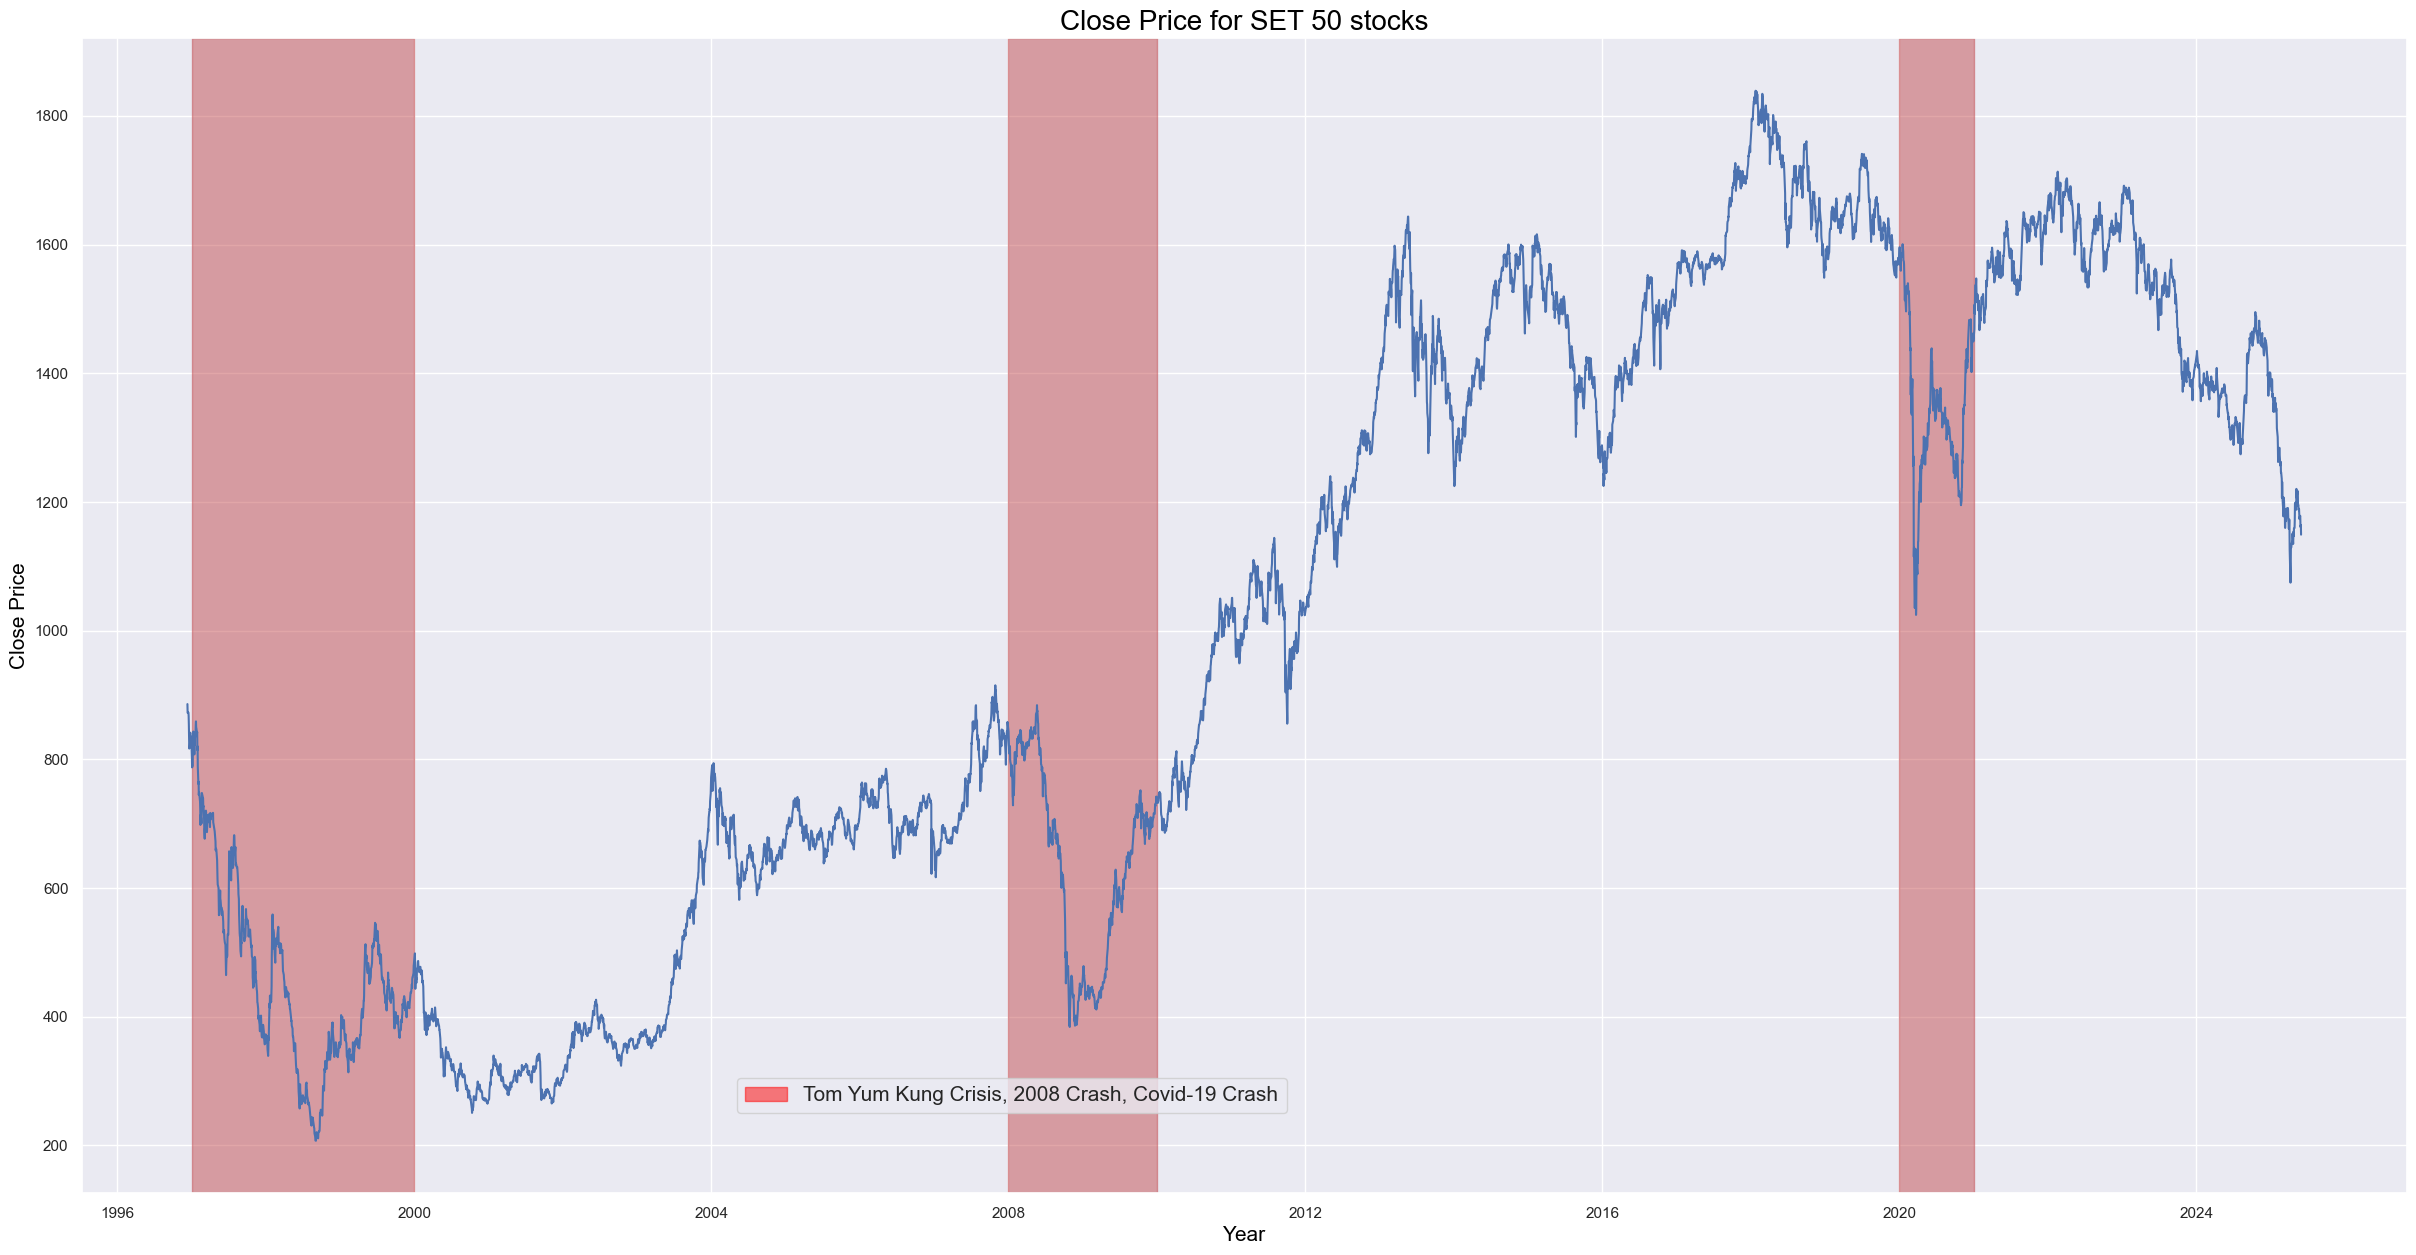

In [27]:
plt.figure(figsize=(30, 15))
plt.plot(set50['Close'])
plt.axvspan('1997','2000',color='r',alpha=.5)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
labs = mpatches.Patch(color='red',alpha=.5, label="Tom Yum Kung Crisis, 2008 Crash, Covid-19 Crash")
plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.1), loc='upper center', borderaxespad=0.)
plt.title('Close Price for SET 50 stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Close Price', color = 'black', fontsize = 15)
plt.show()

In [28]:
daily_returns = set50['Close'].pct_change()
daily_returns.dropna(inplace=True)
daily_returns.head()

Date
1996-12-12   -0.015364
1996-12-13    0.000481
1996-12-16    0.000103
1996-12-17   -0.006336
1996-12-18   -0.015463
Name: Close, dtype: float64

In [30]:
# Resample returns per month and take Standard Dev as measure of volatility
mnthly_annu = daily_returns.resample('ME').std()* np.sqrt(12)
mnthly_annu.head()

Date
1996-12-31    0.045423
1997-01-31    0.068784
1997-02-28    0.067508
1997-03-31    0.052485
1997-04-30    0.042762
Freq: ME, Name: Close, dtype: float64

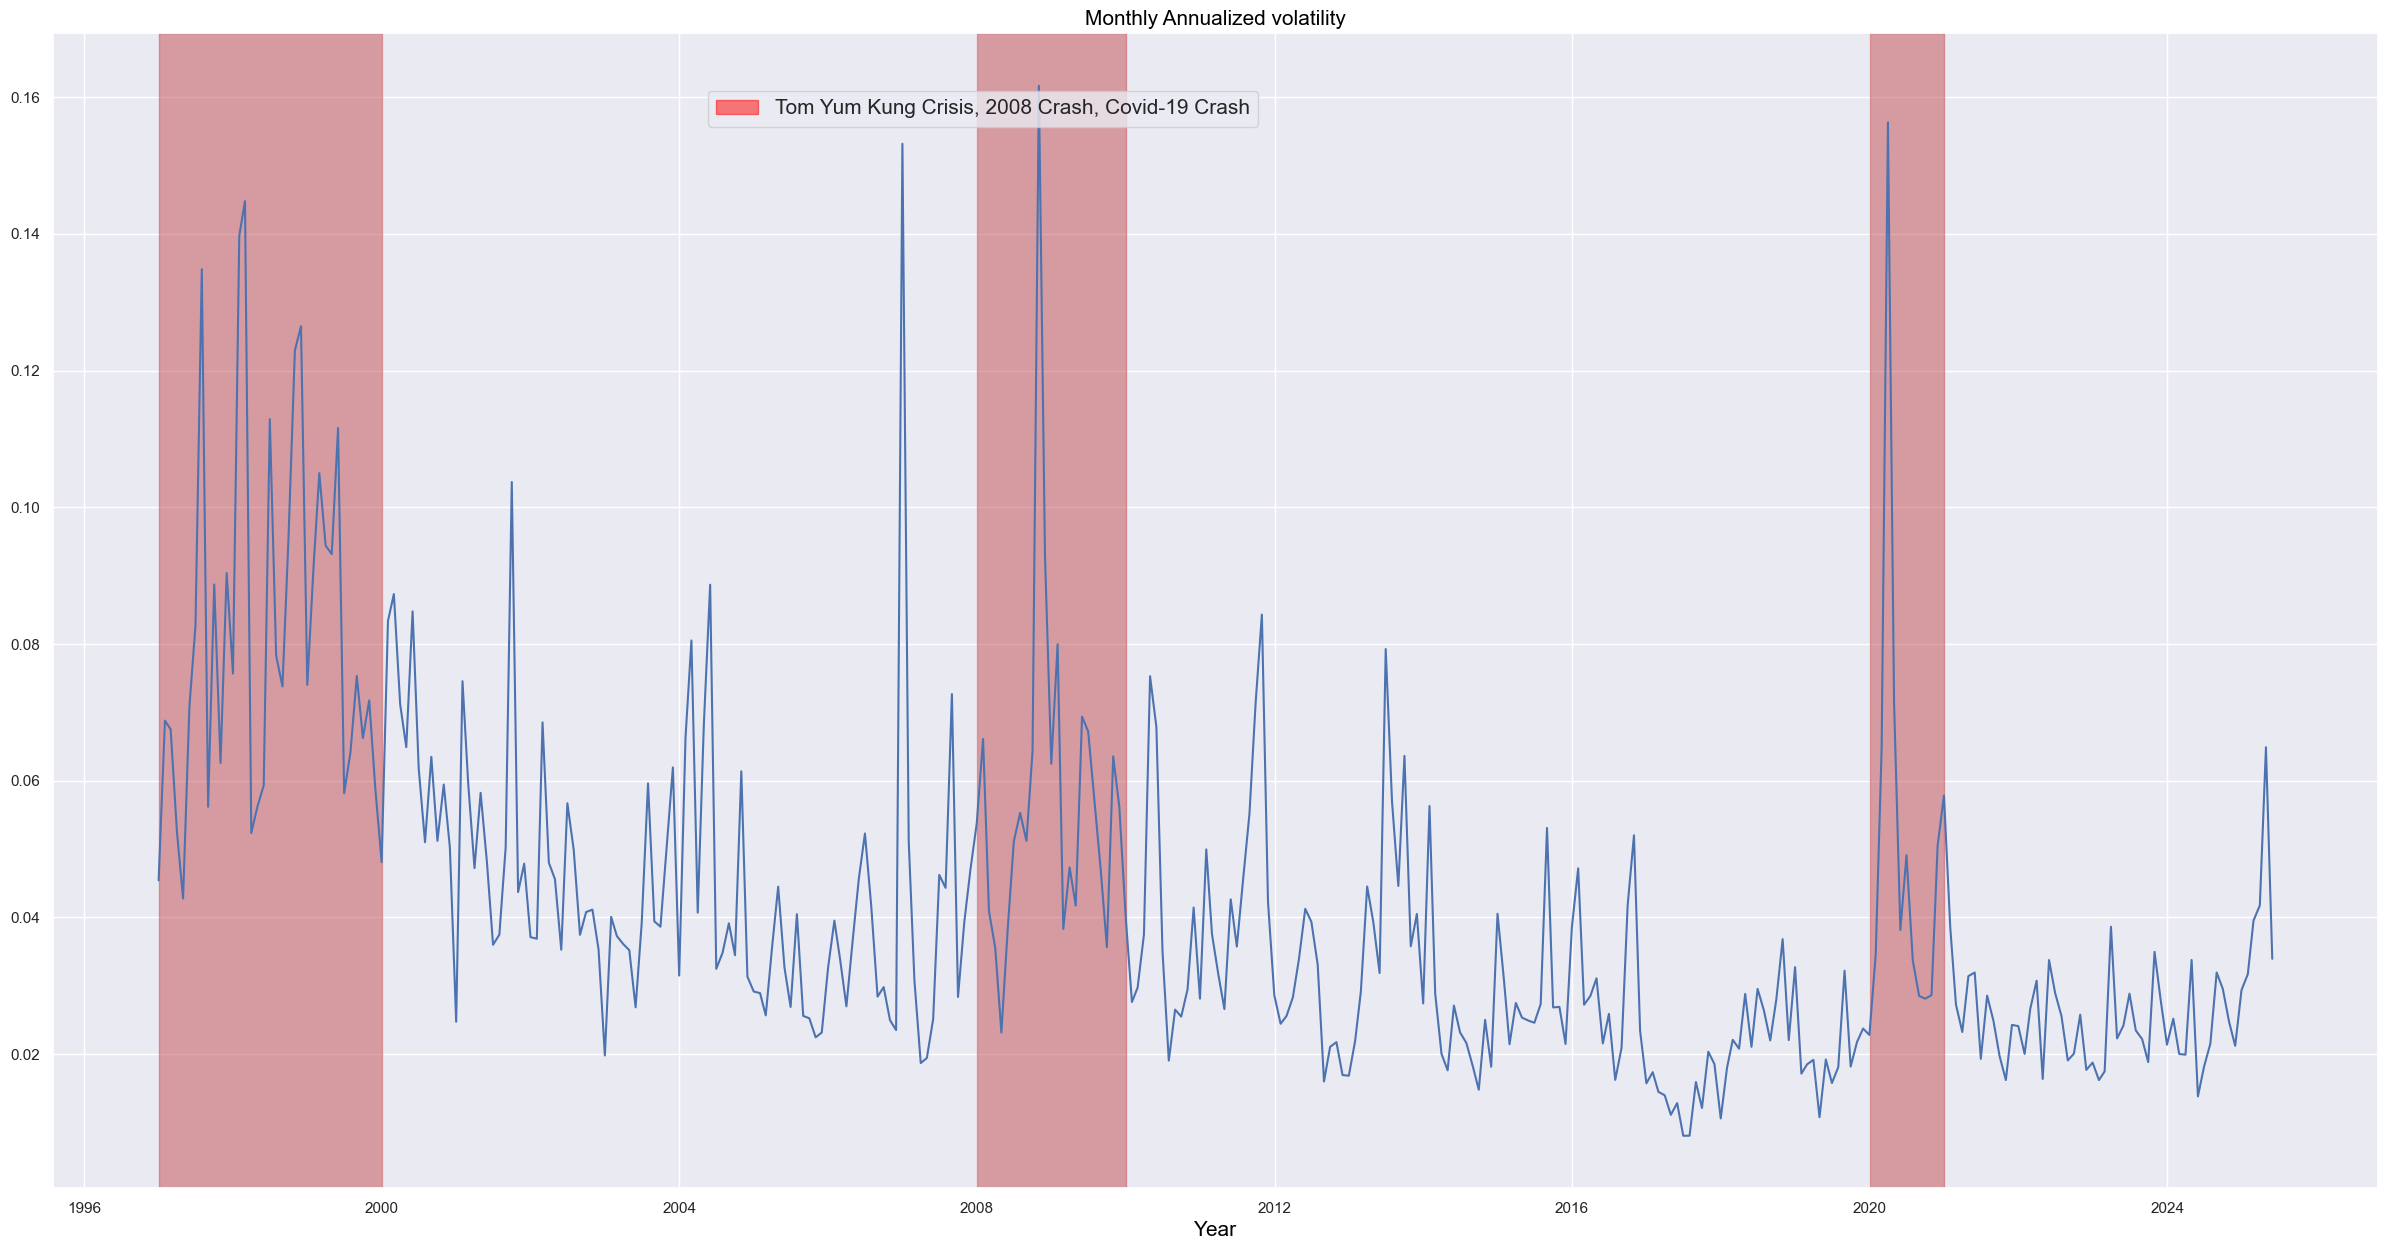

In [ ]:
#ความผันผวนของตลาด
plt.figure(figsize=(30,15))
plt.plot(mnthly_annu)
plt.axvspan('1997','2000',color='r',alpha=.5)
plt.axvspan('2008','2010',color='r',alpha=.5)
plt.axvspan('2020','2021',color='r',alpha=.5)
labs = mpatches.Patch(color='red',alpha=.5, label="Tom Yum Kung Crisis, 2008 Crash, Covid-19 Crash")
plt.legend(handles=[labs], prop={"size":15},  bbox_to_anchor=(0.4, 0.95), loc='upper center', borderaxespad=0.)
plt.title('Monthly Annualized volatility', color = 'black', fontsize = 15)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.show()

In [33]:
# Group volatility by year and create a ranking for each of the 12 months over all years of data
ranked = mnthly_annu.groupby(mnthly_annu.index.year).rank()
final = ranked.groupby(ranked.index.month).mean()

final.describe()

count    12.000000
mean      6.432471
std       0.590415
min       5.241379
25%       6.190887
50%       6.375000
75%       6.784483
max       7.379310
Name: Close, dtype: float64

In [34]:
print(final)

Date
1     7.379310
2     6.758621
3     6.241379
4     6.206897
5     6.862069
6     6.500000
7     6.642857
8     6.250000
9     5.785714
10    7.178571
11    6.142857
12    5.241379
Name: Close, dtype: float64


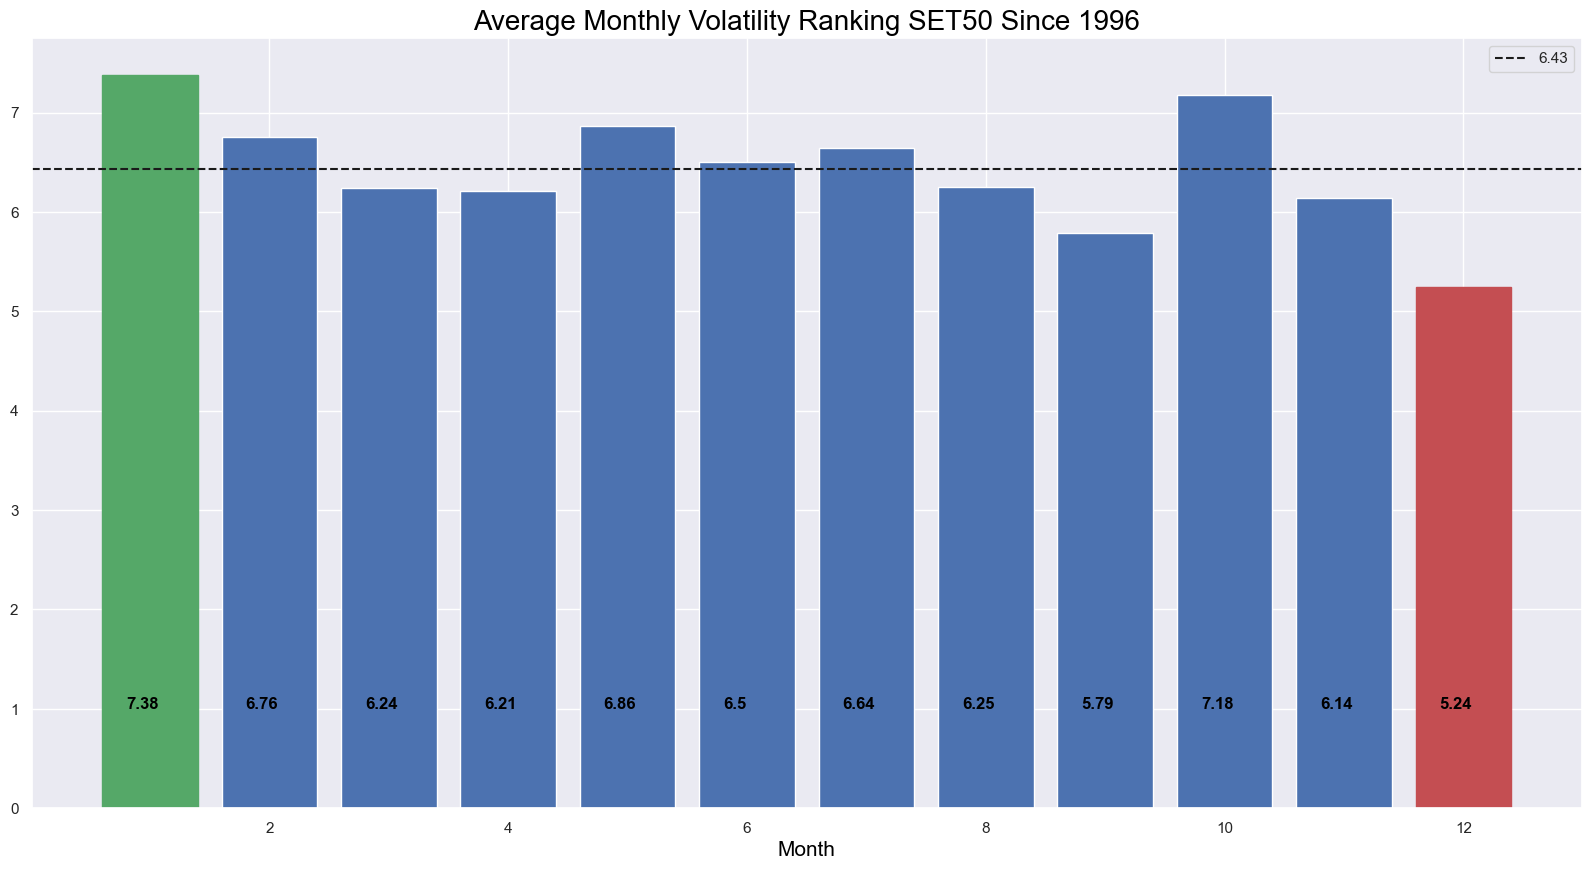

In [37]:
b_plot = plt.bar(x=final.index,height=final)
b_plot[0].set_color('g')
b_plot[11].set_color('r')
for i,v in enumerate(round(final,2)):
    plt.text(i+.8,1,str(v), color='black', fontweight='bold')
plt.axhline(final.mean(),ls='--',color='k',label=round(final.mean(),2))
plt.title('Average Monthly Volatility Ranking SET50 Since 1996', color = 'black', fontsize = 20)
plt.xlabel('Month', color = 'black', fontsize = 15)
plt.legend()
plt.show()

## Hypothesis Testing

We wish to test “whether the observed effect in our data is real or whether it could happen simply by chance”.

To perform this test we do the following:

*   Choose an appropriate ‘test statistic’
*   Construct a Null Hypothesis
*   Compute a p-value

In [41]:
fin = abs(final - final.mean())
print(fin.sort_values())
Jan_value = fin[1]
Dec_value = fin[12]
print('Extreme Jan value:', Jan_value)
print('Extreme Dec value:', Dec_value)

Date
6     0.067529
8     0.182471
3     0.191092
7     0.210386
4     0.225575
11    0.289614
2     0.326149
5     0.429598
9     0.646757
10    0.746100
1     0.946839
12    1.191092
Name: Close, dtype: float64
Extreme Jan value: 0.946839080459771
Extreme Dec value: 1.1910919540229878


In [48]:
daily_returns.head()

Date
1996-12-12   -0.015364
1996-12-13    0.000481
1996-12-16    0.000103
1996-12-17   -0.006336
1996-12-18   -0.015463
Name: Close, dtype: float64

In [49]:
new_df_sim = pd.DataFrame()
highest_only = []

count=0
n=1000
for i in range(n):
    daily_returns_shuffle = daily_returns.sample(6945).reset_index(drop=True)
    daily_returns_shuffle.index = (pd.bdate_range(start='1996-12-12',periods=6945))
    
    mnthly_annu = daily_returns_shuffle.resample('ME').std()* np.sqrt(12)
    
    ranked = mnthly_annu.groupby(mnthly_annu.index.year).rank()
    sim_final = ranked.groupby(ranked.index.month).mean()
    new_df_sim = pd.concat([new_df_sim,sim_final],axis=1)
    
    maxi_month = max(sim_final)
    highest_only.append(maxi_month)
    

    
all_months = new_df_sim.values.flatten()
mu_all_months = all_months.mean()
abs_all_months = abs(all_months-mu_all_months)    

mu_highest = np.mean(highest_only)
abs_highest = [abs(x - mu_all_months) for x in highest_only]

In [51]:
count=0
for i in abs_all_months:
    if i> Dec_value:
        count+=1
ans = count/len(abs_all_months)        
print('p-value:', ans )

p-value: 0.07858333333333334


In [52]:
count=0
for i in abs_highest:
    if i> Dec_value:
        count+=1
ans = count/len(abs_highest)        
print('p-value:', ans )

p-value: 0.394


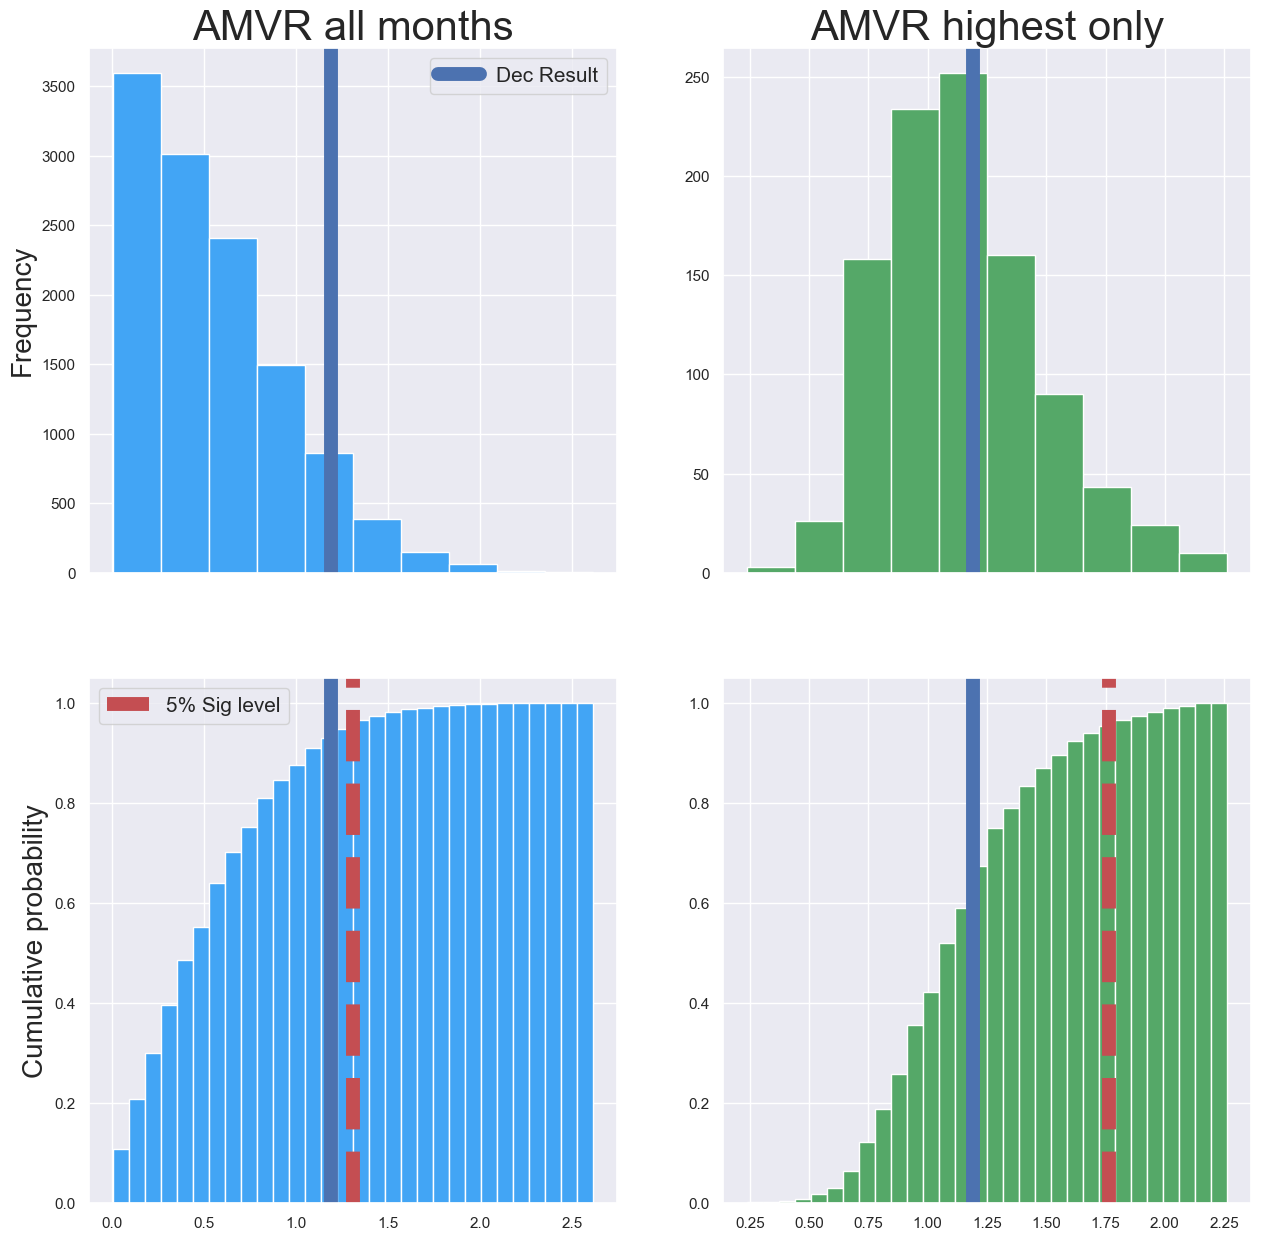

In [57]:
abs_all_months_95 = np.quantile(abs_all_months,.95)
abs_highest_95 = np.quantile(abs_highest,.95)

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex='col',figsize=(15,15))


ax1.hist(abs_all_months,histtype='bar',color='#42a5f5')
ax1.set_title('AMVR all months',fontsize=30)
ax1.set_ylabel('Frequency',fontsize=20)
n,bins,patches = ax3.hist(abs_all_months,density=1,histtype='bar',cumulative=True,bins=30,color='#42a5f5')
ax3.set_ylabel('Cumulative probability',fontsize=20)
ax1.axvline(Dec_value,color='b',label='Dec Result',lw=10)
ax3.axvline(Dec_value,color='b',lw=10)
ax3.axvline(abs_all_months_95,color='r',ls='--',label='5% Sig level',lw=10)


ax2.hist(abs_highest,histtype='bar',color='g')
ax2.set_title('AMVR highest only',fontsize=30)
ax2.axvline(Dec_value,color='b',lw=10)
n,bins,patches = ax4.hist(abs_highest,density=1,histtype='bar',cumulative=True,bins=30,color='g')
ax4.axvline(Dec_value,color='b',lw=10)
ax4.axvline(abs_highest_95,color='r',ls='--',lw=10)

ax1.legend(fontsize=15)
ax3.legend(fontsize=15)

plt.show()

กราฟบนซ้ายและล่างซ้าย (All months): แสดงให้เห็นว่า "Dec Result" (แท่งสีน้ำเงินเข้ม) อยู่ค่อนข้างไปทางซ้ายของฮิสโตแกรม (ค่าต่ำ) และอยู่ค่อนข้างไปทางซ้ายของเส้น "5% Sig level" บนกราฟ CDF แสดงให้เห็นว่าค่าความผันผวนของเดือนธันวาคมนั้น ต่ำกว่าค่าเฉลี่ยของความผันผวนในทุกเดือนอย่างชัดเจน และอาจจะต่ำกว่าถึงขั้นมีนัยสำคัญทางสถิติเมื่อเทียบกับข้อมูลทั้งหมด (ซึ่งสอดคล้องกับที่คุณเห็นในกราฟแท่ง)

กราฟบนขวาและล่างขวา (Highest only): แสดงให้เห็นว่า "Dec Result" (แท่งสีน้ำเงินเข้ม) อยู่ค่อนข้างไปทางซ้ายของฮิสโตแกรมของกลุ่ม "Highest only" และอยู่ค่อนข้างไปทางซ้ายของเส้น "5% Sig level" บนกราฟ CDF ของกลุ่มนี้เช่นกัน ซึ่งยืนยันว่าแม้จะเปรียบเทียบกับกลุ่มเดือนที่มีความผันผวนสูง "Dec Result" ก็ยังคงต่ำกว่าอย่างมีนัยสำคัญ